<a href="https://colab.research.google.com/github/vpagonis/EURADOS-2023/blob/main/Code_2_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# R-CODE 2.12 FITTING 2-PEAK TL DATA FOR LBO WITH KV-EQUATION


In [7]:
# install R package tgcd by Peng et al.
install.packages('tgcd')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



[1] Best fit parameters


,INTENS(Im),ENERGY(E),TEMPER(Tm),rValue(r)
1th-Peak,10968.38,1.182269,490.4689,6.578011e-14



Geometrical shape factor= 0.43
Figure Of Merit FOM= 0.0097

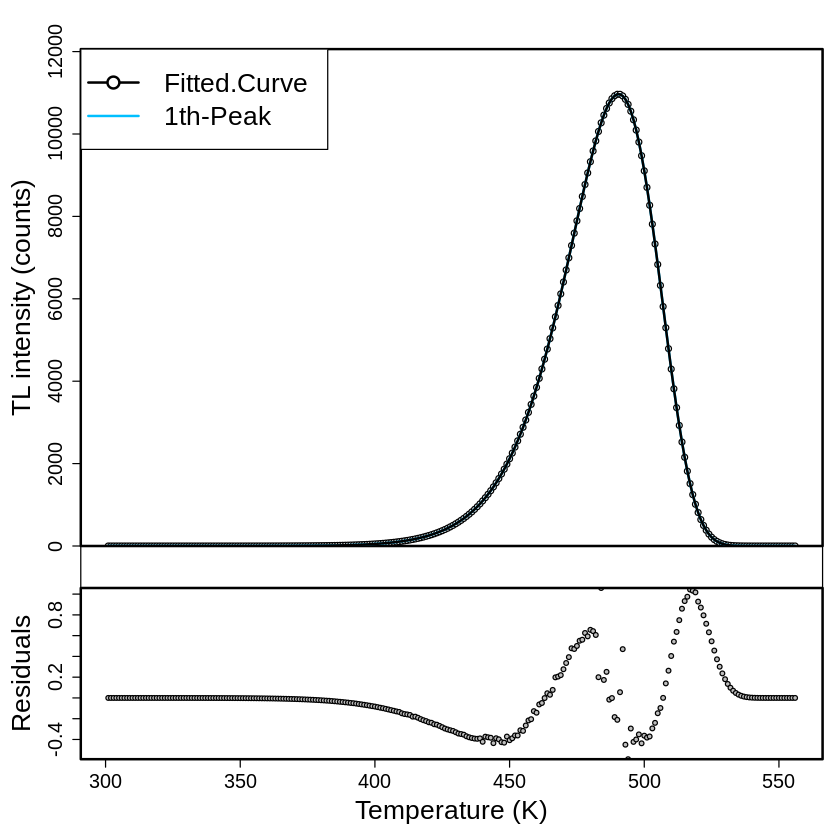

In [8]:
# Deconvolution of Reference glow curve #1 (project GLOCANIN) 

library("tgcd")
data(Refglow)	# Load the data

# Deconvolve data with 1 peak using the LAMBERT W function 
startingPars <-
  cbind(c(15.0),c(1.0),c(520), c(0.1))   # Im, E, Tm, R
invisible(capture.output(TL1 <- tgcd(Refglow$x001, npeak=1, 
                                     model="lw",inisPAR=startingPars,nstart=10,edit.inis=FALSE)))
print.noquote("Best fit parameters")
TL1$pars
cat("\nGeometrical shape factor=",
    round(TL1$sp[,7],2))
cat("\nFigure Of Merit FOM=",round(TL1$FOM,4))

[1] Best fit parameters


,INTENS(Im),ENERGY(E),TEMPER(Tm),rValue(r)
1th-Peak,119.25880,1.221898,464.3231,0.04037411
2th-Peak,22.94754,1.693451,518.1575,0.68952147



Geometrical shape factors  

1th-Peak 2th-Peak 
    0.46     0.51

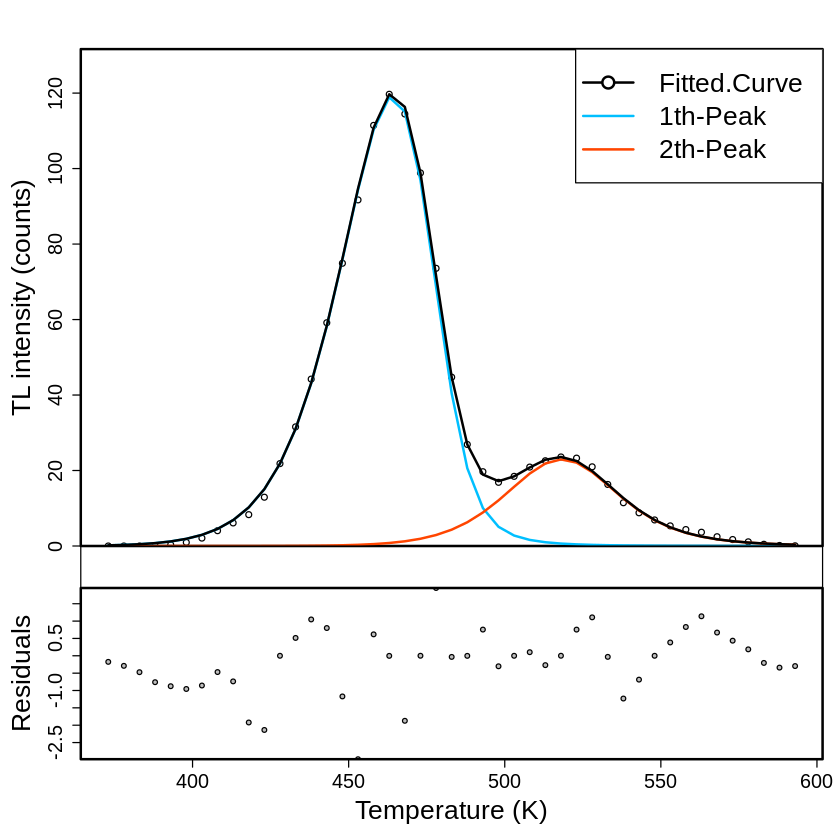

In [9]:
# Deconvolve data with 2 peaks using the LAMBERT W function

library("tgcd")

# Load the data
filename <- "https://github.com/vpagonis/EURADOS-2023/raw/main/lbodata.txt"
mydata <-read.table(url(filename))

startingPars <-
  cbind(c(105.0,5.0),c(1.1,1.4),c(460,550),c(0.01,.01)) #Im,E,Tm,R
invisible(capture.output(TL1 <- tgcd(mydata, npeak=2, 
        model="lw",inisPAR=startingPars, nstart=10, edit.inis=FALSE)))
        
print.noquote("Best fit parameters")
TL1$pars

cat("\nGeometrical shape factors"," ")
round(TL1$sp[,7],2)

[1] Best fit parameters


,INTENS(Im),ENERGY(E),TEMPER(Tm),bValue(b)
1th-Peak,9819.598,1.236083,387.3209,1.024566
2th-Peak,21049.821,1.364918,428.2303,1.162317
3th-Peak,27490.957,2.109638,462.3064,1.940322
4th-Peak,51652.367,2.550174,488.1848,1.143498
5th-Peak,7244.932,1.329431,495.3013,1.000043
6th-Peak,5180.396,1.472240,523.3563,1.346305
7th-Peak,7238.703,2.068934,557.0965,1.258696
8th-Peak,1649.561,3.178659,585.6040,1.037189
9th-Peak,2323.920,2.245576,602.5491,2.000000


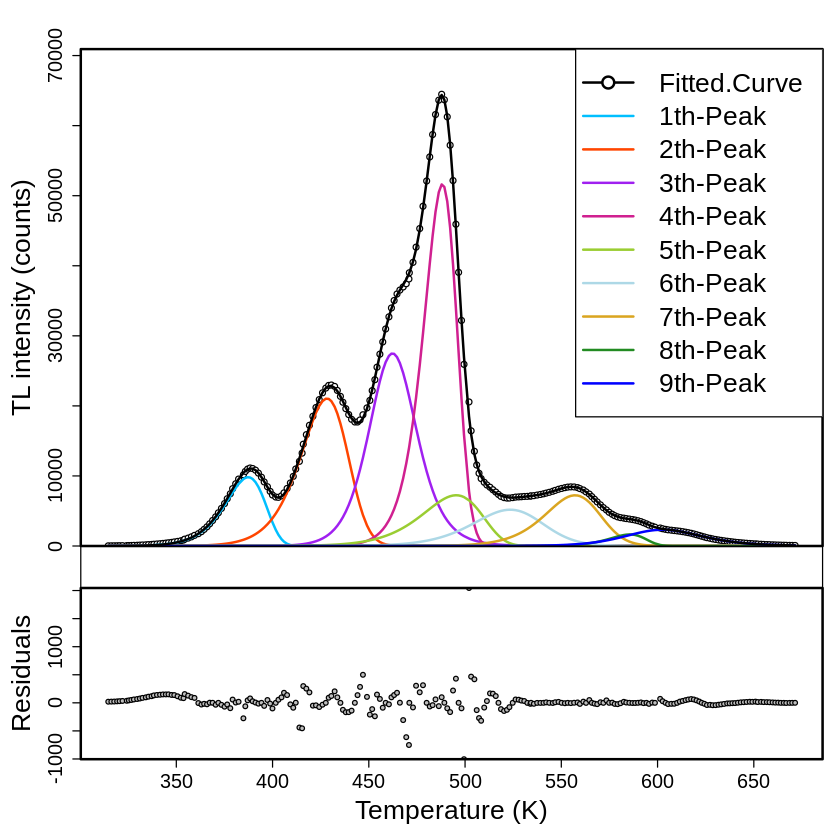

In [10]:
# Deconvolve TL signal using 9 peaks (no background subtraction)
# a GOK model using user-supplied initial kinetic parameters.
rm(list=ls())
library("tgcd")
data(Refglow)
knPars <-
  cbind(c(9824,21009,27792,50520,7153, 5496,6080,1641,2316), # Im
        c(1.24, 1.36, 2.10, 2.65, 1.43, 1.16, 2.48, 2.98, 2.25), # E
        c(387, 428, 462, 488, 493, 528, 559, 585, 602), # Tm
        c(1.02, 1.15, 1.99, 1.20, 1.28, 1.19, 1.40, 1.01, 1.18)) # b
invisible(capture.output(TL1 <- tgcd(Refglow$x009, npeak=9,
                                     model="g1",inisPAR=knPars, nstart=10, edit.inis=FALSE)))
print.noquote("Best fit parameters")
TL1$pars

[1] Best fit parameters


,INTENS(Im),ENERGY(E),TEMPER(Tm),aValue(a)
1th-Peak,10967.96,1.182694,490.341,0.0004896865


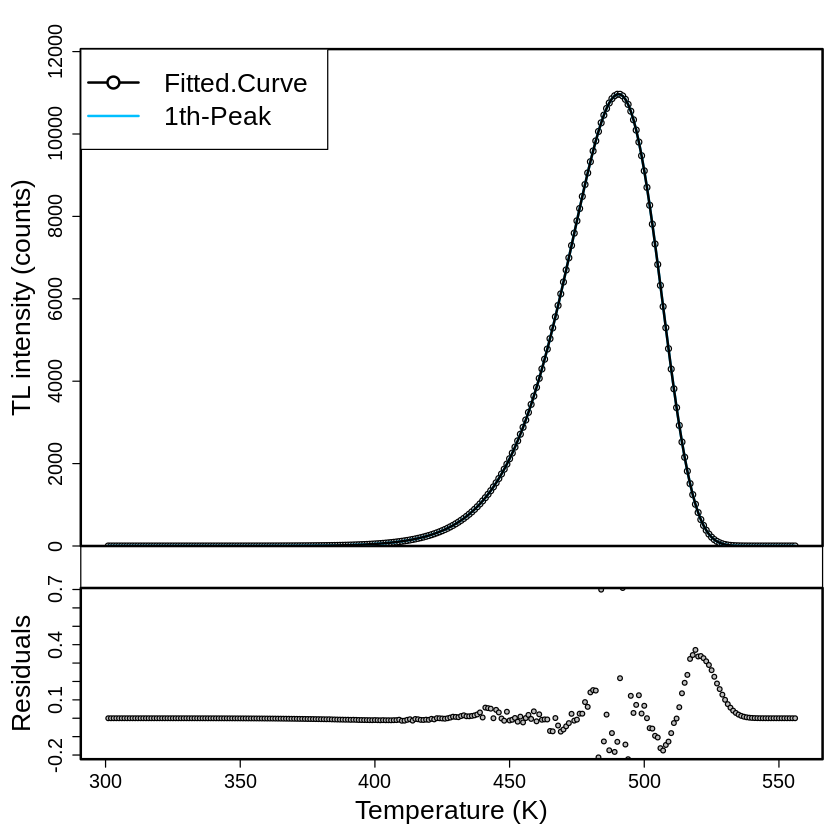

In [11]:
# Deconvolution of Reference GLOCANIN glow curve #1 with MOK 
rm(list=ls())
library("tgcd")
data(Refglow)
# Load the data.
# Deconvolve data with 1 peak using the MOK expression
startingPars <-
  cbind(c(15.0),  c(1.0), c(520), c(0.1)) # Im, E, Tm, R
invisible(capture.output(TL1 <- tgcd(Refglow$x001, npeak=1, 
                                     model="m1",inisPAR=startingPars, nstart=10, edit.inis=FALSE)))
print.noquote("Best fit parameters")
TL1$pars